In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

# Pandas

One of the downsides of NumPy is that it is difficult to work with data that is heterogenous (that is, of mixed data types). Such data is very common, however. Pandas (https://pandas.pydata.org/) is a Python library makes working with such data significantly easier. Similar to NumPy, Pandas is often used to work with tabular data. The two primary data structures are the [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (one-dimensional arrays) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) (two-dimensional arrays, which can be thought of as dictionaries of Series). 

More details on Pandas can be found in the following tutorials. 

* https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

## Series

Series are one-dimensional arrays in elements have indexes (essentially labels). They can be created in  a number of ways, including from a Python dictionary. If no indexes are provided when defined, then integer indexes 0, 1, 2, ..., are used. Series can also be given names. 

In [2]:
import pandas as pd
import numpy as np

def hr():
    print('-'*40)

series1 = pd.Series([10,20,30]) # no indexes or name specified
series2 = pd.Series([1,2,3,4.0,5], index=['first', 'second', 'third', 'fourth', 'fifth'], name="s2")
series3 = pd.Series({3:'a', 'd':0, '7':8}, name="s3") # from a dictionary.
series4 = pd.Series(42, range(10), name="s4") # from a scalar, with indexes. 

print(series1)
hr()
print(series2)
hr()
print(series1[2])
hr()
print(series3[3])
hr()
print(series4)

0    10
1    20
2    30
dtype: int64
----------------------------------------
first     1.0
second    2.0
third     3.0
fourth    4.0
fifth     5.0
Name: s2, dtype: float64
----------------------------------------
30
----------------------------------------
a
----------------------------------------
0    42
1    42
2    42
3    42
4    42
5    42
6    42
7    42
8    42
9    42
Name: s4, dtype: int64


You can examine a series using several builtin properties and methods. 

In [ ]:
print(series2.size)
print(series2.shape)
print(series2.dtype)
print(series2.index)

## Accessing Elements and  Slicing

Series work much like NumPy ndarrays and can be sliced. 

In [ ]:
series = pd.Series({'a':1, 'b':2, 'c':3})

series['a'] = 10
print(series)

In [ ]:
series = pd.Series(range(100,1000, 25), index=list(range(100, 136)), name = "s")
series[100]  # note we're referencing by label

In [ ]:
series[[102,101,100,109]]  # note we're referencing by label

In [ ]:
series[10:15] # note we're referencing by position

In [ ]:
series[series > 800] # slicing using a boolean condition

In [ ]:
series > 800 #The condition itself returns a new series. 

In [ ]:
series.mean()

In [ ]:
series[series < series.mean()]

In [ ]:
series == 150

## DataFrames

DataFrame objects can be viewed as two-dimensional arrays--rows and columns in which the columns may be of different data types. You can create a DataFrame in one of several ways. One way is simply to pass a tabular structure of data (a nested list, or a NumPy ndarray). 

In [ ]:
df = pd.DataFrame([[1,2,3], [4,5,6]])
df

You can specify labels for the indexes and columns.

In [ ]:
ar = np.array([[1,2,3], [4,5,6]])
df = pd.DataFrame(ar, columns=['a','b','c'], index=['row1', 'row2'])
df

You can also create a DataFrame from a dictionary of Series. 

In [ ]:
s1 = pd.Series([1,4], index=['row1', 'row2'])
s2 = pd.Series([2,5], index=['row1', 'row2'])
s3 = pd.Series([3,6], index=['row1', 'row2'])
df = pd.DataFrame({'a':s1, 'b':s2, 'c':s3})
df

DataFrames can also be created from a list of dictionaries.

In [ ]:
df = pd.DataFrame([{'a':1, 'b':2, 'c':3},{'a':4, 'b':5, 'c':6}] )
df.index = ['row1', 'row2']
df

## Accessing, inserting, deleting, and manipulating columns

Once created, you can refer to columns of data using the column name.

In [ ]:
df['a']

In [ ]:
df[['a','c']]

In [ ]:
print(df.columns)
print(df.index)

In [ ]:
df['d'] = df['c'] + 1
df

In [ ]:
df = df * 2
df

In [ ]:
df['c'] = pd.Series({'row1':6.5}) 
df

In [ ]:
del df['c']
df

Note the datatype of the following: 

In [ ]:
type(df['a'])

In [ ]:
type(df[['a','b']])

## Accessing rows/indexes

In [ ]:
df = pd.DataFrame([{'a':1, 'b':2, 'c':3},{'a':4, 'b':5, 'c':6},{'a':9, 'b':8, 'c':9}] )
df.index = ['row1', 'row2', 'row3']
df

In [ ]:
df.loc['row2'] # by index label

In [ ]:
df.iloc[1] # by index position ()

In [ ]:
df[1:]

In [ ]:
df.iloc[1:]

## Basic Operations on DataFrames

In [ ]:
df1 = pd.DataFrame([[1,2,3,4,5], [6,7,8,9,10]], index=['x','y'], columns=list("abcde"))
df1

In [ ]:
df2 = pd.DataFrame([[1,2,3,4,5], [6,7,8,9,10]], index=['x','y'], columns=list("abcde"))
df2 = 1- df2 % 2
df2 = df2 == True
df2

In [ ]:
df3 = df1 > 4
df3

In [ ]:
df4 = df2 & df3
df4

## Basic Statistics and other information

In [ ]:
df1 = pd.DataFrame([[1,2,3,4,5], [6,7,8,9,10]], index=['x','y'], columns=list("abcde"))
df1

In [ ]:
df1.mean(axis=0)

In [ ]:
df1.mean(axis=1) # or min, max, median, std, etc.

In [ ]:
df1.describe()

In [ ]:
df2 = pd.DataFrame(np.array(range(1000)).reshape((500,2)), columns=['a','b'])
df2.head()

In [ ]:
df2.tail()

## Reading and Writing CSV files

Reading in csv files is generally fairly easy in Pandas, but there are many options. See [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
df2.to_csv(".\\test.csv", header=True,index=False)

In [3]:
df3 = pd.read_csv(".\\test.csv", header=0)
df3

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
...,...,...
495,990,991
496,992,993
497,994,995
498,996,997


In [4]:
df3 = pd.read_csv(".\\test.csv", header=0, index_col=0)
df3

,b
a,
0,1
2,3
4,5
6,7
8,9
...,...
990,991
992,993
994,995


## Plotting in Pandas

It is possible to create figures and charts by invoking methods directly on Pandas objects. 

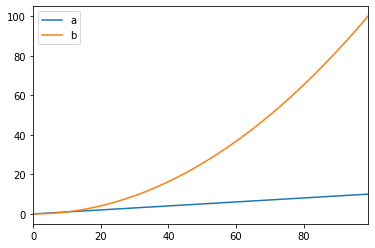

In [8]:
#import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = x ** 2
df = pd.DataFrame(np.array([x,y]).T, columns=['a', 'b'])
df.plot()
pass

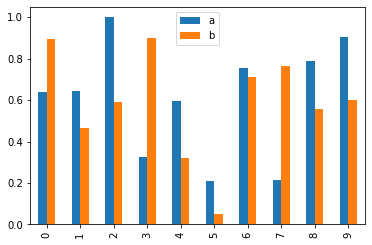

In [9]:
x = np.random.rand(10)
y = np.random.rand(10)
df = pd.DataFrame(np.array([x,y]).T, columns=['a', 'b'])
df.plot.bar()
pass

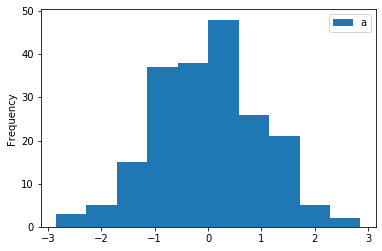

In [10]:
x = np.random.randn(200)
df = pd.DataFrame(x, columns=['a'])
df.plot.hist()
pass